# Explore here

In [3]:
print("Hello World")

Hello World


In [6]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns


# modelado
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# escalado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# selecicon
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.feature_selection import chi2
from sklearn.exceptions import NotFittedError

# modelado
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

# metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score

# optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import random

import os
import joblib


df = pd.read_csv('/workspaces/fraud/data/Base.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/workspaces/fraud/data/Base.csv'

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [21]:
df.nunique()

fraud_bool                               2
income                                   9
name_email_similarity               998861
prev_address_months_count              374
current_address_months_count           423
customer_age                             9
days_since_request                  989330
intended_balcon_amount              994971
payment_type                             5
zip_count_4w                          6306
velocity_6h                         998687
velocity_24h                        998940
velocity_4w                         998318
bank_branch_count_8w                  2326
date_of_birth_distinct_emails_4w        40
employment_status                        7
credit_risk_score                      551
email_is_free                            2
housing_status                           7
phone_home_valid                         2
phone_mobile_valid                       2
bank_months_count                       33
has_other_cards                          2
proposed_cr

In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


In [23]:
print(" ")
print(f"EL DATAFRAME ORIGINAL TIENE UNA MATRIZ DE:", df.shape)

 
EL DATAFRAME ORIGINAL TIENE UNA MATRIZ DE: (1000000, 32)


In [24]:
duplicados = df.duplicated()
numeros_duplicados = duplicados.sum()
print(numeros_duplicados)

0


In [25]:
# Cargar el dataset
df1 = pd.read_csv('/workspaces/fraud/data/Base.csv')

# Filtrar las filas donde fraud_bool es 0
zero_fraud_df = df[df['fraud_bool'] == 0]

# Contar cuántas filas tienen fraud_bool igual a 0
num_zero_fraud = len(zero_fraud_df)

if num_zero_fraud <= 900000:
    # Si hay menos o igual a 900,000 filas, eliminamos todas
    df = df[df['fraud_bool'] != 0]
else:
    # Si hay más de 900,000 filas, eliminamos una muestra de 900,000 filas
    zero_fraud_sample = zero_fraud_df.sample(n=900000, replace=False)
    df = df.drop(zero_fraud_sample.index)

# Guardar el dataframe resultante en un nuevo archivo CSV
df.to_csv('/workspaces/fraud/data/Base_100milfilas.csv', index=False)

print(f"{min(num_zero_fraud, 900000)} filas con fraud_bool 0 han sido eliminadas y guardadas en 'Base_100milfilas.csv'.")

900000 filas con fraud_bool 0 han sido eliminadas y guardadas en 'Base_100milfilas.csv'.


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 18 to 999998
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fraud_bool                        100000 non-null  int64  
 1   income                            100000 non-null  float64
 2   name_email_similarity             100000 non-null  float64
 3   prev_address_months_count         100000 non-null  int64  
 4   current_address_months_count      100000 non-null  int64  
 5   customer_age                      100000 non-null  int64  
 6   days_since_request                100000 non-null  float64
 7   intended_balcon_amount            100000 non-null  float64
 8   payment_type                      100000 non-null  object 
 9   zip_count_4w                      100000 non-null  int64  
 10  velocity_6h                       100000 non-null  float64
 11  velocity_24h                      100000 non-null  float

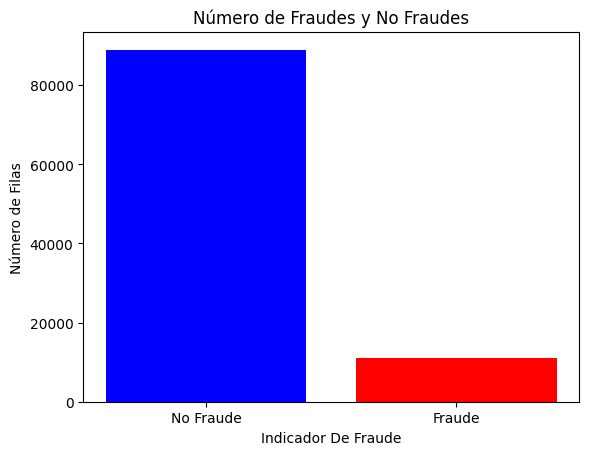

In [27]:
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('/workspaces/fraud/data/Base_100milfilas.csv')

# Contar el número de filas con 0 y 1 en la columna fraud_bool
fraud_bool_counts = df['fraud_bool'].value_counts()

# Crear un gráfico de barras
plt.bar(fraud_bool_counts.index, fraud_bool_counts.values, color=['blue', 'red'])
plt.xlabel('Indicador De Fraude')
plt.ylabel('Número de Filas')
plt.title('Número de Fraudes y No Fraudes')
plt.xticks([0, 1], ['No Fraude', 'Fraude'])
plt.show()

In [28]:
print("------------------------(1). ACA EMPIEZA LA LIMPIEZA DE LOS DATOS---------------------------------\n")

------------------------(1). ACA EMPIEZA LA LIMPIEZA DE LOS DATOS---------------------------------



In [29]:
print("------------------------(2). REVISO SI HAY DATOS DUPLICADOS----------------------------\n")
duplicados = df.duplicated()
numero_de_duplicados = duplicados.sum()
print(f"LOS NUMEROS DUPLICADOS DEL DATASET SON: {numero_de_duplicados}")

------------------------(2). REVISO SI HAY DATOS DUPLICADOS----------------------------

LOS NUMEROS DUPLICADOS DEL DATASET SON: 0


In [30]:
print("------(3). CUENTO CUANTOS 'NaN' EXISTEN POR COLUMNAS PARA SABER DONDE DEBEMOS REEMPLAZARLAS------\n") 
nan_counts = df.isna().sum() 
print("CONTEO DE LOS 'NaN' POR COLUMNAS:") 
nan_counts

------(3). CUENTO CUANTOS 'NaN' EXISTEN POR COLUMNAS PARA SABER DONDE DEBEMOS REEMPLAZARLAS------

CONTEO DE LOS 'NaN' POR COLUMNAS:


fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [31]:
print("--------------------(4). IDENTIFICO VALORES FALTANTES-------------------------------\n")
Valores_faltantes = df.isnull().sum() 
print("Valores faltantes por columna:\n", Valores_faltantes)

--------------------(4). IDENTIFICO VALORES FALTANTES-------------------------------

Valores faltantes por columna:
 fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed

In [32]:
print("----------------(7). ORDENO LAS COLUMNAS CON LOS VALORES NULOS-----------------\n")
df.isnull().sum().sort_values(ascending=False)

----------------(7). ORDENO LAS COLUMNAS CON LOS VALORES NULOS-----------------



fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

--------(8). REALIZO GRAFICO DE MAPA DE CALOR PARA MIRAR CORRELACIONES-------------


<Figure size 1500x1000 with 0 Axes>

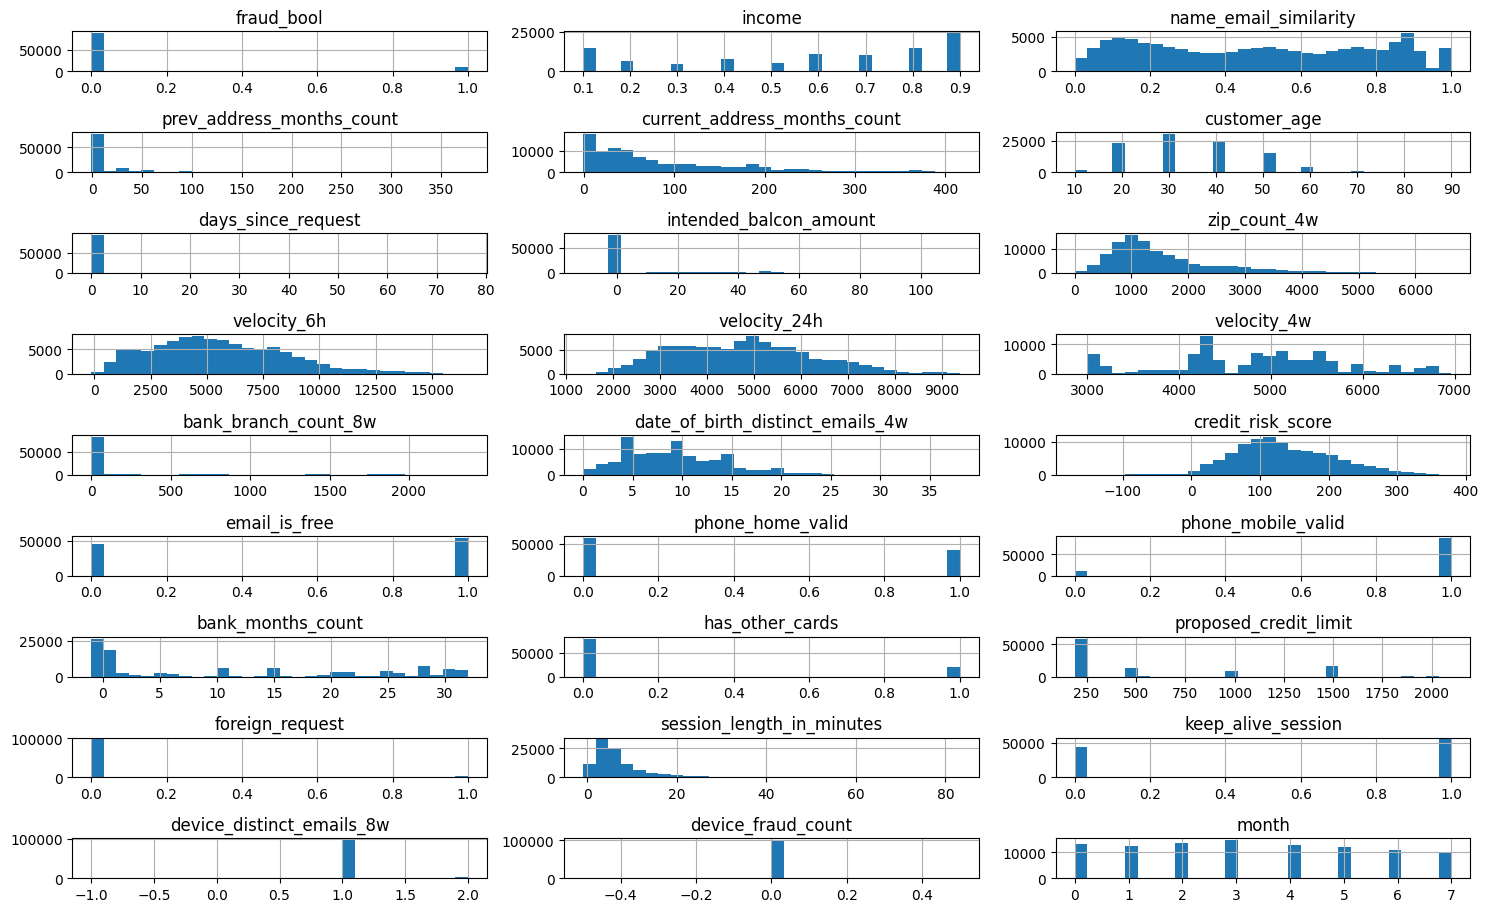

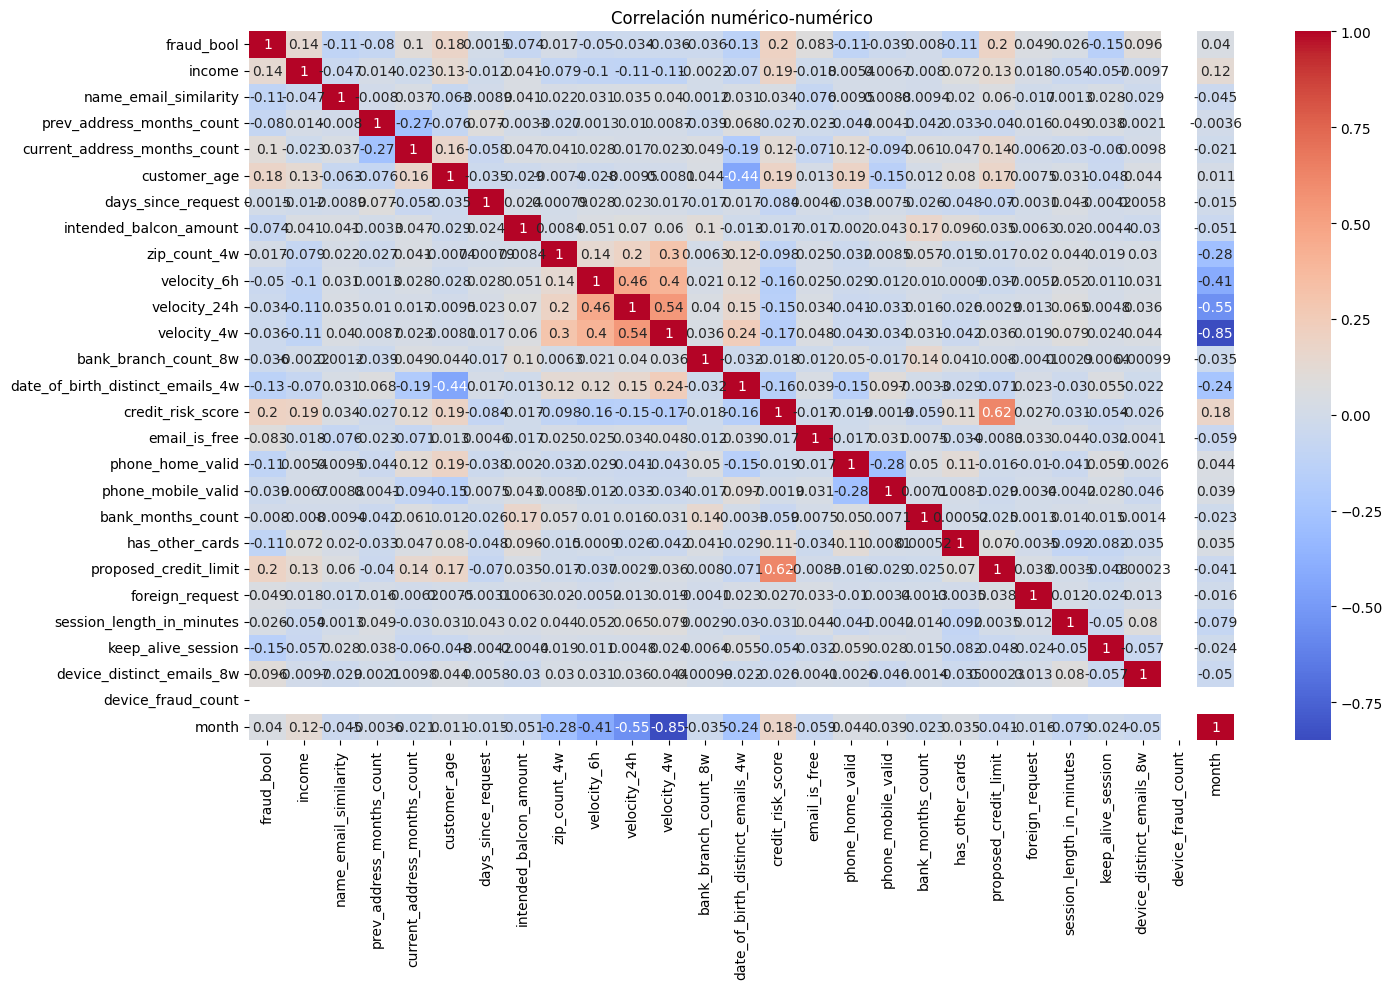

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Seleccionar todas las columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns

print("--------(8). REALIZO GRAFICO DE MAPA DE CALOR PARA MIRAR CORRELACIONES-------------")

# Ajustar el tamaño de la figura para que se ajuste a la pantalla de salida
plt.figure(figsize=(15, 10))

# Distribuciones de las variables numéricas
df[numeric_cols].hist(bins=30, figsize=(15, 10), layout=(len(numeric_cols)//3 + 1, 3))
plt.tight_layout()
plt.show()

# Ajustar el tamaño de la figura para que se ajuste a la pantalla de salida
plt.figure(figsize=(15, 10))

# Mapa de calor de la correlación
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlación numérico-numérico")
plt.tight_layout()
plt.show()

---------(10). REALIZO GRAFICOS BOXPLOT PARA DETALLAR OUTLIERS----------


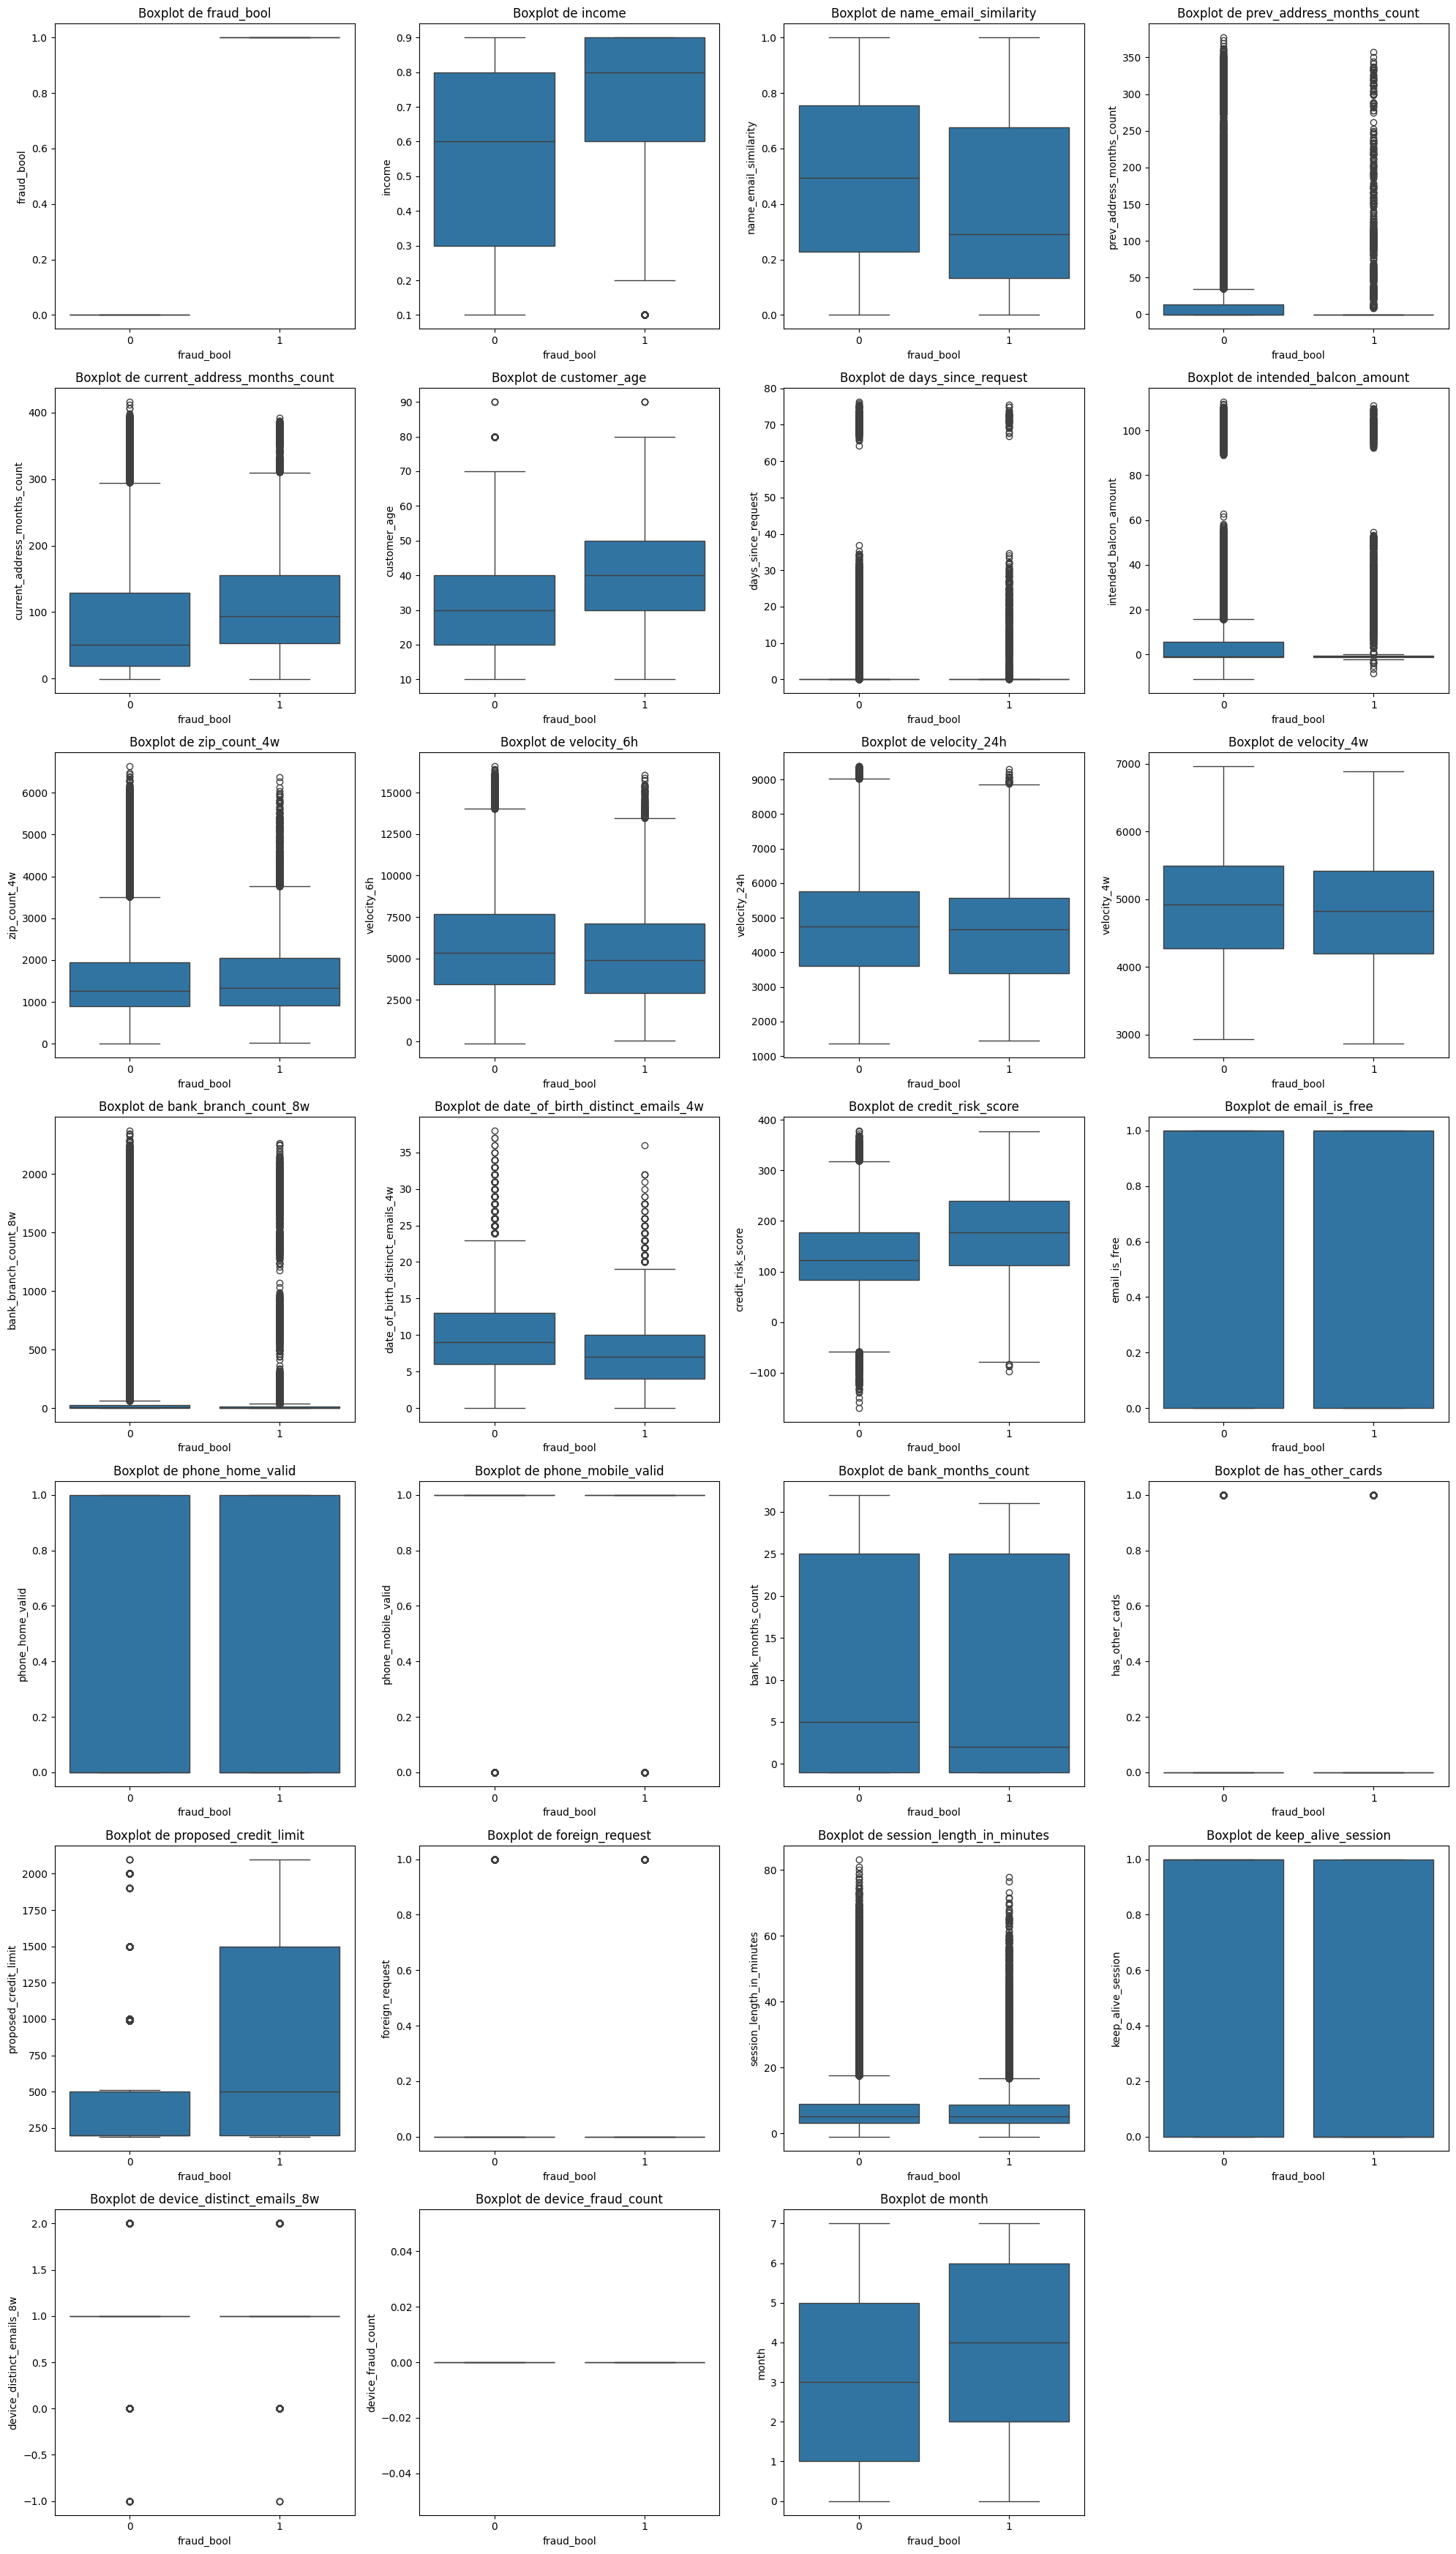

In [34]:
print("---------(10). REALIZO GRAFICOS BOXPLOT PARA DETALLAR OUTLIERS----------")

# Seleccionar todas las columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns

# Calcular el número de filas necesarias
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Crear subplots dinámicos
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 5))

# Grafico boxplots para cada variable
for i, var in enumerate(numeric_cols):
    sns.boxplot(x='fraud_bool', y=var, data=df, ax=axes[i//n_cols, i%n_cols])
    axes[i//n_cols, i%n_cols].set_title(f'Boxplot de {var}')

# Eliminar subplots vacíos
for j in range(len(numeric_cols), n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


In [35]:
print("-----------------(12). DIVIDO EL CONJUNTO DE DATOS EN ENTRENAMIENTO Y PRUEBA---------------\n")
# Divido el conjunto de datos en muestras de train y test
X = df.drop("fraud_bool", axis = 1)
y = df["fraud_bool"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

-----------------(12). DIVIDO EL CONJUNTO DE DATOS EN ENTRENAMIENTO Y PRUEBA---------------



,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
75220,0.2,0.288476,-1,205,20,0.007508,19.093474,AA,1081,4568.142666,...,0,200.0,0,INTERNET,40.925527,other,0,1,0,5
48955,0.1,0.350824,-1,34,30,0.012133,-1.533011,AC,2288,3894.123825,...,0,200.0,0,INTERNET,1.371585,linux,1,1,0,3
44966,0.6,0.273992,-1,178,30,0.011172,-0.700981,AC,1868,7282.755113,...,0,200.0,0,INTERNET,9.452303,linux,0,1,0,3
13568,0.6,0.900417,12,17,30,8.287318,-1.250413,AC,901,8515.383846,...,0,1500.0,0,INTERNET,1.666984,windows,0,1,0,1
92727,0.9,0.851479,99,15,40,0.004327,-0.887372,AB,635,2479.999666,...,1,1500.0,0,INTERNET,4.585306,windows,1,1,0,7


In [36]:
print("-----------(13). IDENTIFICO Y ESCALO LAS VARIABLES NUMERICAS EXCLUYENDO LA VARIABLE OBJETIVO-----\n")
# Identifico las variables numéricas automáticamente, excluyendo 'fraud_bool' 
variables_numericas = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col]) and col != 'fraud_bool']

# Instancio el escalador
scaler = StandardScaler()

# Entreno el escalador con los datos de entrenamiento
scaler.fit(X_train[variables_numericas])

# Aplico el escalador en los datos de entrenamiento
X_train_final = scaler.transform(X_train[variables_numericas])
X_train_final = pd.DataFrame(X_train_final, index=X_train.index, columns=variables_numericas)

# Aplico el escalador en los datos de prueba
X_test_final = scaler.transform(X_test[variables_numericas])
X_test_final = pd.DataFrame(X_test_final, index=X_test.index, columns=variables_numericas)

# Muestro las primeras filas de los datos escalados de entrenamiento
print(X_train_final.head())

-----------(13). IDENTIFICO Y ESCALO LAS VARIABLES NUMERICAS EXCLUYENDO LA VARIABLE OBJETIVO-----

         income  name_email_similarity  prev_address_months_count  \
75220 -1.289711              -0.669860                  -0.386242   
48955 -1.634274              -0.456031                  -0.386242   
44966  0.088540              -0.719534                  -0.386242   
13568  0.088540               1.428856                  -0.085160   
92727  1.122228               1.261016                   1.929774   

       current_address_months_count  customer_age  days_since_request  \
75220                      1.316124     -1.170546           -0.188346   
48955                     -0.622544     -0.357843           -0.187494   
44966                      1.010019     -0.357843           -0.187671   
13568                     -0.815277     -0.357843            1.336750   
92727                     -0.837951      0.454860           -0.188932   

       intended_balcon_amount  zip_count_4w  ve

In [37]:
print("-------------(14). IDENTIFICO LAS VARIABLES CATEGORICAS DE TODO EL DATASET-------------\n")
# Identifico variables categóricas automáticamente, como en este no hay aparecen en cero
columnas_categoricas = [col for col in df.columns if pd.api.types.is_object_dtype(df[col])]

print("Variables categóricas:")
print(columnas_categoricas)

-------------(14). IDENTIFICO LAS VARIABLES CATEGORICAS DE TODO EL DATASET-------------

Variables categóricas:
['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


In [38]:
print("--------------(15). SELECCIONO LAS MEJORES CARACTERISTICAS DE TODO EL DATASET-------------\n")
# Con un valor de k = 20
selection_model = SelectKBest(score_func=f_classif, k = 20)

# entreno la selecciòn
selection_model.fit(X_train_final, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_final), columns = X_train_final.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_final), columns = X_test_final.columns.values[ix])

X_train_sel

--------------(15). SELECCIONO LAS MEJORES CARACTERISTICAS DE TODO EL DATASET-------------



/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,intended_balcon_amount,velocity_6h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,has_other_cards,proposed_credit_limit,foreign_request,keep_alive_session,device_distinct_emails_8w,month
0,-1.289711,-0.669860,-0.386242,1.316124,-1.170546,0.546452,-0.348247,-0.530874,-0.389425,-0.650248,-0.820752,0.913892,-0.822292,0.357659,-0.511790,-0.677039,-0.16816,-1.114463,-0.122914,0.758443
1,-1.634274,-0.456031,-0.386242,-0.622544,-0.357843,-0.487254,-0.572597,0.089568,-0.393788,-0.452421,-0.848394,-1.094221,1.216112,0.357659,-0.511790,-0.677039,-0.16816,0.897293,-0.122914,-0.140459
2,0.088540,-0.719534,-0.386242,1.010019,-0.357843,-0.445556,0.555319,0.357434,-0.393788,-0.056766,0.202015,0.913892,-0.822292,0.357659,-0.511790,-0.677039,-0.16816,-1.114463,-0.122914,-0.140459
3,0.088540,1.428856,-0.085160,-0.815277,-0.357843,-0.473091,0.965603,0.530458,-0.393788,0.536715,-0.848394,0.913892,-0.822292,0.357659,-0.511790,1.851355,-0.16816,-1.114463,-0.122914,-1.039360
4,1.122228,1.261016,1.929774,-0.837951,0.454860,-0.454897,-1.043292,-1.881190,1.347101,-0.452421,1.846735,0.913892,-0.822292,0.357659,1.953926,1.851355,-0.16816,0.897293,-0.122914,1.657344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,-0.945149,-0.028229,0.887566,-1.008010,2.080265,-0.455932,-0.002838,0.057318,-0.391606,-1.441556,-0.793110,0.913892,-0.822292,0.357659,-0.511790,-0.677039,-0.16816,-1.114463,-0.122914,-1.488811
79996,-1.634274,-0.841698,-0.386242,-0.078356,-1.170546,-0.453404,1.077448,0.097439,-0.367609,-0.452421,-0.350832,-1.094221,-0.822292,0.357659,-0.511790,-0.093563,-0.16816,0.897293,-0.122914,0.308992
79997,0.433102,0.398490,-0.386242,-0.282427,1.267562,-0.442381,-0.528861,-0.754361,1.259838,-0.650248,-0.433759,-1.094221,1.216112,-2.795956,-0.511790,-0.677039,-0.16816,0.897293,-0.122914,0.758443
79998,0.433102,0.687170,-0.386242,0.681239,-0.357843,2.253737,-1.557242,1.193463,-0.367609,-0.254594,0.423154,0.913892,-0.822292,0.357659,-0.511790,1.851355,-0.16816,-1.114463,-0.122914,-1.488811


In [39]:
print("----------------(16). OBTENGO LAS PUNTUACIONES DE MAYOR A MENOR DE ESAS MEJORES CARACTERISTICAS------------\n")
# Obtengo las puntuaciones y las características seleccionadas 
scores = selection_model.scores_ 
selected_indices = selection_model.get_support(indices=True) 
selected_features = X.columns[selected_indices] 

# Creo un DataFrame con las características y sus puntuaciones 
scores_df = pd.DataFrame({'Características': selected_features, 'Puntuaciones': scores[selected_indices]}) 
scores_df = scores_df.sort_values(by='Puntuaciones', ascending=False) 

# Muestro las 20 mejores características con sus puntuaciones 

scores_df

----------------(16). OBTENGO LAS PUNTUACIONES DE MAYOR A MENOR DE ESAS MEJORES CARACTERISTICAS------------



,Características,Puntuaciones
10,date_of_birth_distinct_emails_4w,3408.092905
15,phone_mobile_valid,3132.423978
4,customer_age,2789.579471
17,proposed_credit_limit,1794.179011
0,income,1506.127192
9,bank_branch_count_8w,1304.709841
1,name_email_similarity,1010.260213
12,credit_risk_score,899.509241
14,phone_home_valid,897.290559
3,current_address_months_count,861.510471


In [40]:

print("------------(17). MODELO DE ARBOL DE DECISION-------------")
model1 = DecisionTreeClassifier(random_state = 42)

------------(17). MODELO DE ARBOL DE DECISION-------------


In [41]:
print("--------------(18). ENTRENO EL MODELO DE ARBOL DE DECISION------------")
model1.fit(X_train_sel, y_train)

--------------(18). ENTRENO EL MODELO DE ARBOL DE DECISION------------


DecisionTreeClassifier(random_state=42)

--------------(19). GRAFICO EL ARBOL------------


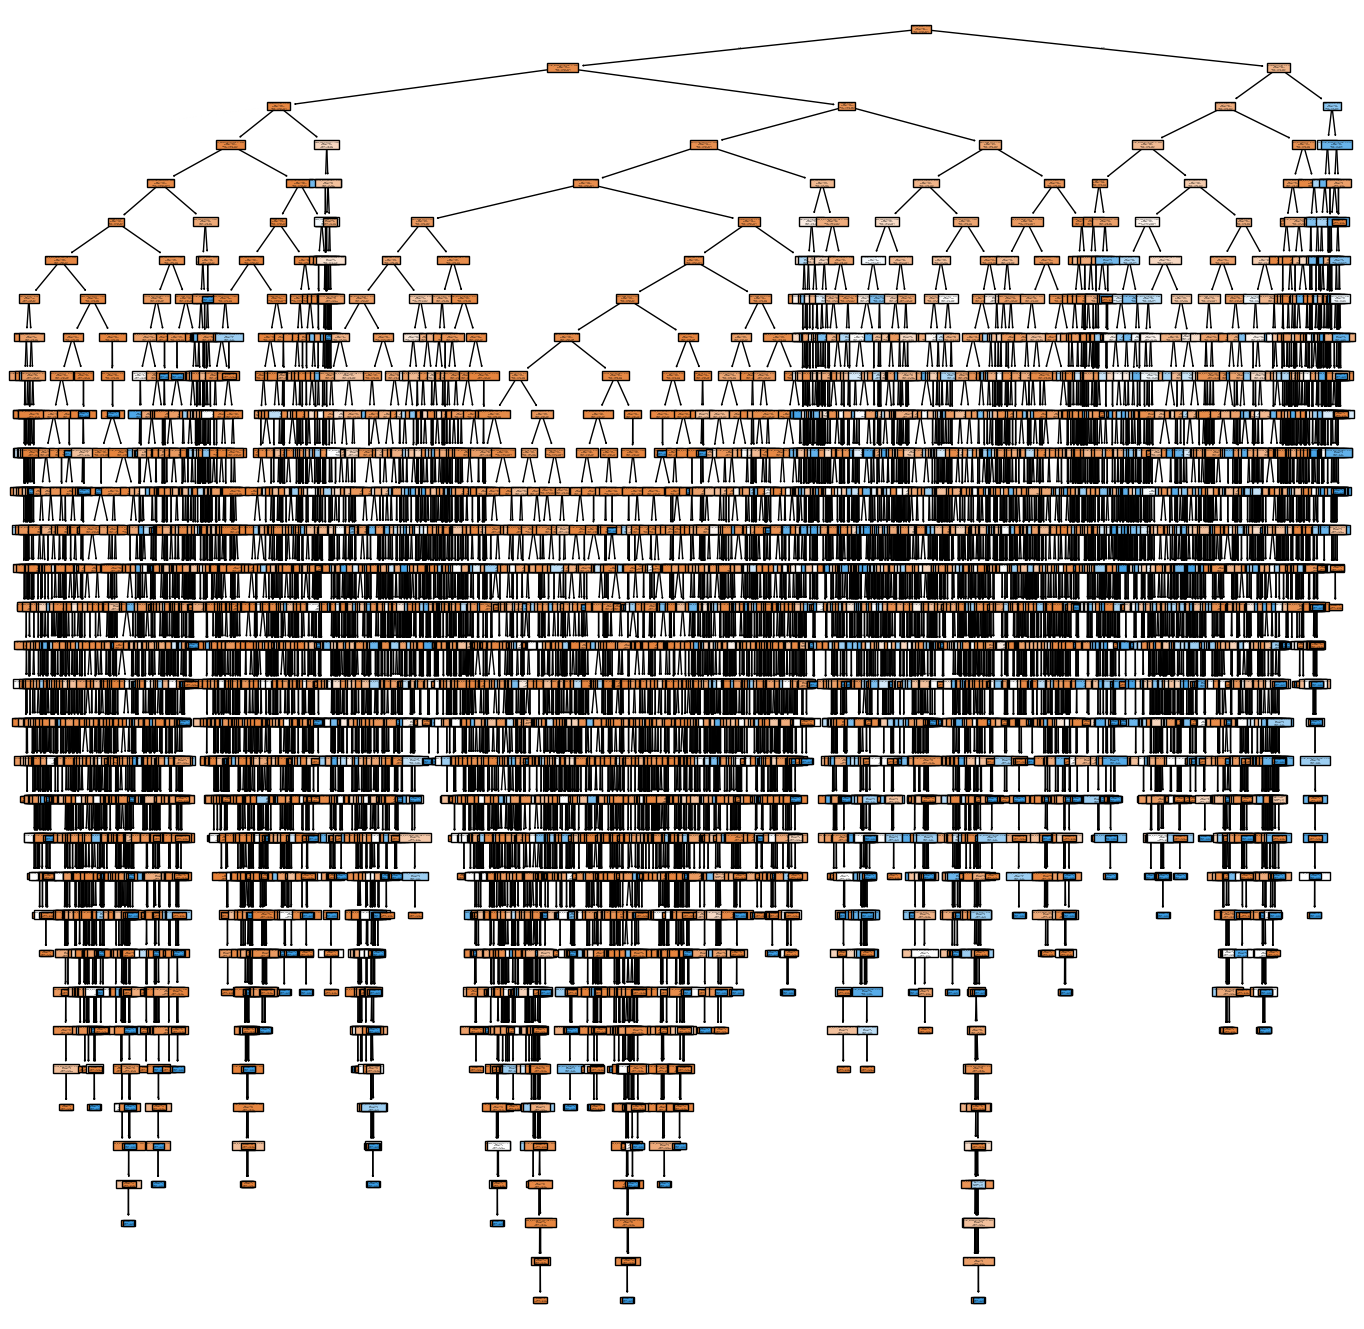

In [42]:
print("--------------(19). GRAFICO EL ARBOL------------")
ig = plt.figure(figsize=(17,17))

tree.plot_tree(model1, feature_names = list(X_train_sel.columns), class_names = ["No Fraude", "Fraude"], filled = True)

plt.show()

In [43]:
print("--------------(20). EJECUTO LA PREDICCION DEL TEST DEL MODELO ORIGINAL------------")
# predigo el test
y_pred_test = model1.predict(X_test_sel)
y_pred_test

--------------(20). EJECUTO LA PREDICCION DEL TEST DEL MODELO ORIGINAL------------


array([0, 0, 0, ..., 0, 0, 0], shape=(20000,))

In [44]:
print("------------(21). EJECUTO LA PREDICCION DEL TRAIN DEL MODELO ORIGINAL-----------")
# predigo el train
y_pred_train = model1.predict(X_train_sel)
y_pred_train

------------(21). EJECUTO LA PREDICCION DEL TRAIN DEL MODELO ORIGINAL-----------


array([0, 0, 0, ..., 0, 0, 0], shape=(80000,))

In [45]:
print("--------------(22). REALIZO METRICAS PARA MEDIR EL LOS DATOS DE ENTRENAMIENTO Y PRUEBA----------")
# metricas el modelo inicial sin ajustes
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test Arbol inicial: ", accuracy_test)
print("F1 score Test Arbol inicial: ", f1_score_test)
print("Precision Test Arbol inicial: ", precision_test)
print("Recall Test Arbol inicial: ", recall_test)

print("Accuracy Train Arbol inicial: ", accuracy_train)
print("F1 score Train Arbol inicial: ", f1_score_train)
print("Precision Train Arbol inicial: ", precision_train)
print("Recall Train Arbol inicial: ", recall_train)

--------------(22). REALIZO METRICAS PARA MEDIR EL LOS DATOS DE ENTRENAMIENTO Y PRUEBA----------
Accuracy Test Arbol inicial:  0.84465
F1 score Test Arbol inicial:  0.84465
Precision Test Arbol inicial:  0.84465
Recall Test Arbol inicial:  0.84465
Accuracy Train Arbol inicial:  1.0
F1 score Train Arbol inicial:  1.0
Precision Train Arbol inicial:  1.0
Recall Train Arbol inicial:  1.0


In [46]:
print("----------(23). COMPARAMOS LAS METRICAS DE LA PRUEBA-------------")
print(classification_report(y_test, y_pred_test, target_names=["No Fraude", "Fraude"]))

----------(23). COMPARAMOS LAS METRICAS DE LA PRUEBA-------------
              precision    recall  f1-score   support

   No Fraude       0.92      0.91      0.91     17762
      Fraude       0.32      0.34      0.33      2238

    accuracy                           0.84     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.85      0.84      0.85     20000



In [47]:

print("----------(24). COMPARAMOS LAS METRICAS DEL ENTRENAMIENTO-------------")
print(classification_report(y_train, y_pred_train, target_names=["No Fraude", "Fraude"]))

----------(24). COMPARAMOS LAS METRICAS DEL ENTRENAMIENTO-------------
              precision    recall  f1-score   support

   No Fraude       1.00      1.00      1.00     71209
      Fraude       1.00      1.00      1.00      8791

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



In [57]:
# Definir la ruta donde se guardará el modelo
ruta_modelo = '/workspaces/fraud/models/modelo_Arbol_inicial.pkl'

# Verificar si el directorio existe, si no, crearlo
directorio = os.path.dirname(ruta_modelo)
if not os.path.exists(directorio):
    os.makedirs(directorio)

# Guardar el modelo MultinomialNB
joblib.dump(model1, ruta_modelo)

print(f"Modelo guardado en: {ruta_modelo}")

Modelo guardado en: /workspaces/fraud/models/modelo_Arbol_optimizado.pkl


: 